In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
%matplotlib inline
import regex as re

##Data loadig & preprocessing

In [ ]:
df1 = pd.read_csv("text_classification_dataset.csv") #data source 1
df2 = pd.read_csv("stockerbot-export1.csv") # data source 2
df2 = pd.DataFrame(df2["text"]).sample(n = 300, replace=False, random_state=1024) #select 300 records from df2
df2["type"] = "financial" 

In [ ]:
df = df1.append(df2).reset_index(drop = True) #concatenate
df

,text,type
0,@ACNI2012 @TheToka920 Never knew having 1 or 2...,sports
1,"MYCA Magical Moments:\n\nSeptember, 2011: Sham...",sports
2,The current state of last year's @BBL finalist...,sports
3,@HOLLYJISOO Why did you bring a cricket...,sports
4,Babar Azam only Pakistani included in the ICC ...,sports
...,...,...
1457,Guggenheim Begins Coverage on NetApp $NTAP htt...,financial
1458,You need to see this minutes old press release...,financial
1459,RT @rick_decard: $CL #WTI inventarios #EIA hoy...,financial
1460,Yandex $YNDX vs. HealthStream $HSTM Financial ...,financial


In [ ]:
def clean(tweet):
    # Remove Punctuation using regex
    tweet = re.sub(r'http\S+', '', tweet) #removing tweets urls
    tweet = re.sub(r'@\S+', '', tweet) #removing user names
    #tweet = re.sub(r'[^\w\s]','', tweet)    #special characters 
    return re.sub('[^A-Za-z0-9]+', ' ', tweet) #further cleaning

for i, tweet in enumerate (df["text"]):
    df["text"].iloc[i] = clean(tweet)
df

,text,type
0,Never knew having 1 or 2 followers had anythi...,sports
1,MYCA Magical Moments September 2011 Sham Choto...,sports
2,The current state of last year s finalists P10...,sports
3,Why did you bring a cricket,sports
4,Babar Azam only Pakistani included in the ICC ...,sports
...,...,...
1457,Guggenheim Begins Coverage on NetApp NTAP,financial
1458,You need to see this minutes old press release...,financial
1459,RT CL WTI inventarios EIA hoy anduve ocupado a...,financial
1460,Yandex YNDX vs HealthStream HSTM Financial Com...,financial


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = stopwords.words('english')
ps = PorterStemmer()
clear_output()

In [ ]:
for i, d in enumerate(df.text):
  l = d.split()
  l = [ps.stem(w.lower()) for w in l if w.lower() not in stop_words]
  new_document = ' '.join(i for i in l)
  df.text[i] = new_document

In [ ]:
df

,text,type
0,never knew 1 2 follow anyth realiti malinga never,sports
1,myca magic moment septemb 2011 sham chotoo bow...,sports
2,current state last year finalist p10 w9 l1 p10...,sports
3,bring cricket,sports
4,babar azam pakistani includ icc odi team year ...,sports
...,...,...
1457,guggenheim begin coverag netapp ntap,financial
1458,need see minut old press releas gnpx cyad kn b...,financial
1459,rt cl wti inventario eia hoy anduv ocupado asi...,financial
1460,yandex yndx vs healthstream hstm financi compa...,financial


## Data visualization

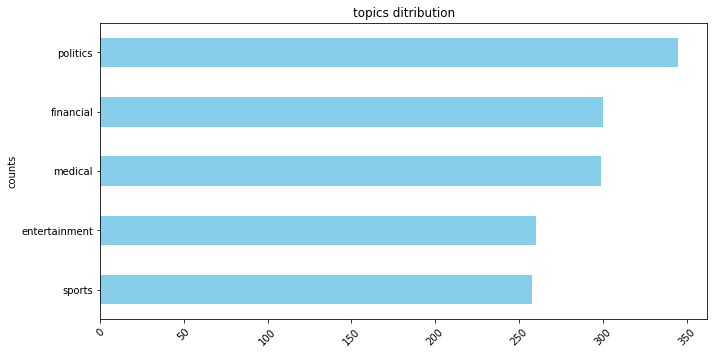

In [ ]:
plt.figure(figsize=(10,5))
valueCounts = df["type"].value_counts()
valueCounts.plot.barh(color='skyblue', align='center')

plt.ylabel('counts')
plt.xticks(rotation = 45)
plt.title("topics ditribution")
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.gca().invert_yaxis()
plt.show()

sports


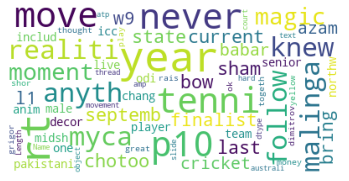

entertainment


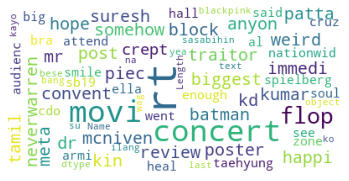

medical


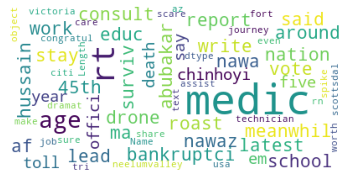

politics


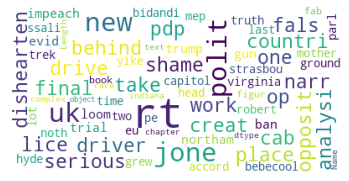

financial


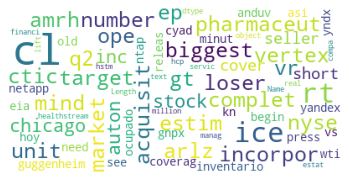

In [ ]:
import wordcloud
import matplotlib.pyplot as plt
for i in df["type"].unique(): 
    print(i)
    wc=wordcloud.WordCloud(background_color='white',max_words=100,max_font_size=50)
    wc=wc.generate(str(df[df['type'] == i].text))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram1_vectorizer_obj = CountVectorizer(analyzer='word', ngram_range=(1, 1)) # , max_features=200
ngram1_vectorizer_model = ngram1_vectorizer_obj.fit_transform(df.iloc[:,0])
ngram1_vectorizer_names = ngram1_vectorizer_obj.get_feature_names()

features1_df = pd.DataFrame(ngram1_vectorizer_model.toarray() ,columns = ngram1_vectorizer_names)
#features1_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Cluster Fields

In [ ]:
#import important libraries
from sklearn.decomposition import PCA

import plotly 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from tqdm import tqdm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_score, plot_confusion_matrix

rs = 2000   #random state value to all models

In [ ]:
# Show All Unique Fields
df.type.unique()

array(['sports', 'entertainment', 'medical', 'politics', 'financial'],
      dtype=object)

In [ ]:
sports = df[df.type == 'sports']
entertainment = df[df.type == 'entertainment']
medical = df[df.type == 'medical']
politics = df[df.type == 'politics']
financial = df[df.type == 'financial']

## Sports

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(sports.iloc[:,0])
bow_names = bow.get_feature_names()

sports_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
sports_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,01,014,05,06,07,08,09,10,100,...,yo,york,young,yousuf,youth,yuzvendra,zampa,zealand,zim,zimbabw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
sports_new_features = pca.fit_transform(sports_df)
sports_new_features

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(sports_new_features[:,0],sports_new_features[:,1])
plt.title("Sports Data After Dimentionality Reduction")

### Kmeans

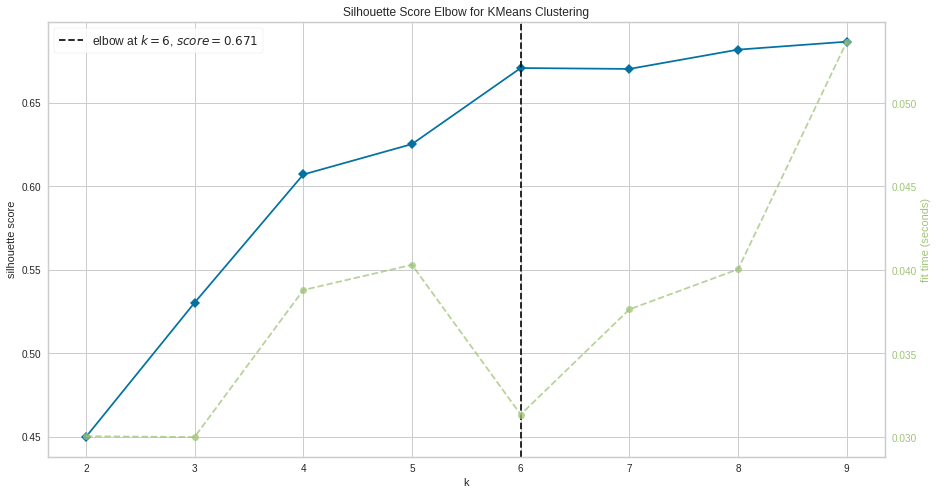

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), sports_new_features, k=(2,10),metric='silhouette',timings=True) 

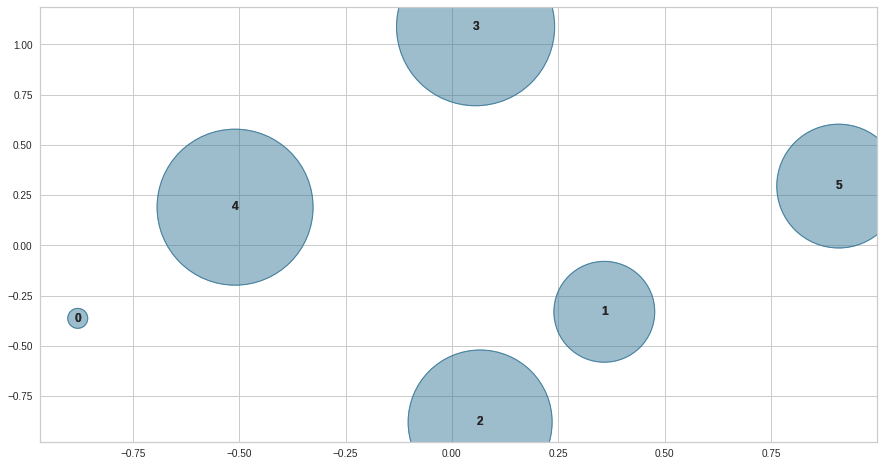

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(6,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(sports_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 6 so we will build the kmean model and use k=6
sports_kmean_model = KMeans(n_clusters=6,init='k-means++',random_state=rs)
sports_kmean_output = sports_kmean_model.fit_predict(sports_new_features)
sports_kmean_output

array([1, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 5, 1, 4, 3, 4, 1, 3, 4, 3, 3, 3,
       1, 4, 4, 3, 5, 3, 5, 5, 5, 3, 5, 4, 4, 4, 5, 4, 3, 1, 3, 3, 5, 3,
       4, 5, 3, 3, 3, 1, 5, 3, 5, 3, 4, 1, 4, 5, 5, 3, 4, 3, 5, 3, 5, 4,
       1, 5, 3, 5, 1, 4, 4, 5, 4, 3, 4, 4, 5, 1, 5, 1, 1, 3, 4, 5, 4, 3,
       5, 3, 5, 3, 4, 3, 3, 5, 5, 4, 3, 3, 5, 3, 3, 5, 1, 1, 4, 1, 4, 4,
       5, 3, 5, 3, 4, 3, 3, 5, 3, 5, 3, 4, 5, 5, 3, 4, 5, 3, 5, 3, 1, 4,
       3, 1, 3, 3, 3, 5, 3, 1, 1, 3, 0, 4, 2, 0, 0, 4, 2, 0, 4, 4, 2, 2,
       1, 4, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 4, 0, 4, 4, 0,
       2, 1, 2, 0, 2, 0, 2, 4, 2, 2, 1, 1, 2, 0, 4, 1, 0, 0, 4, 2, 0, 1,
       2, 1, 2, 0, 2, 4, 0, 1, 0, 0, 0, 2, 1, 4, 4, 0, 1, 2, 1, 1, 4, 0,
       2, 1, 2, 2, 2, 0, 4, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 4,
       2, 2, 0, 4, 2, 2, 1, 0, 2, 0, 2, 2, 1, 4, 0, 4], dtype=int32)

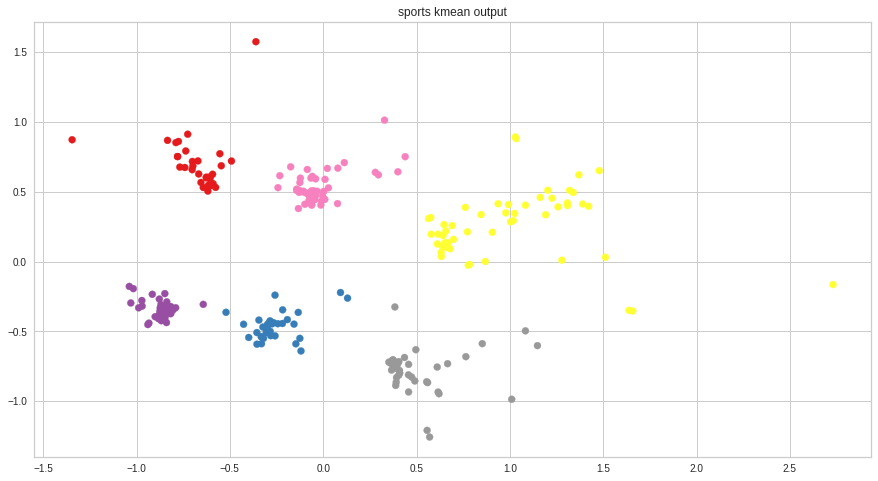

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(sports_new_features[:, 0], sports_new_features[:, 1], c=sports_kmean_output,cmap='Set1')
plt.title("sports kmean output")
plt.show()

## Entertainment

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(entertainment.iloc[:,0])
bow_names = bow.get_feature_names()

entertainment_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
entertainment_df

In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
entertainment_new_features = pca.fit_transform(entertainment_df)
entertainment_new_features

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(entertainment_new_features[:,0],entertainment_new_features[:,1])
plt.title("Entertainment Data After Dimentionality Reduction")

### Kmeans

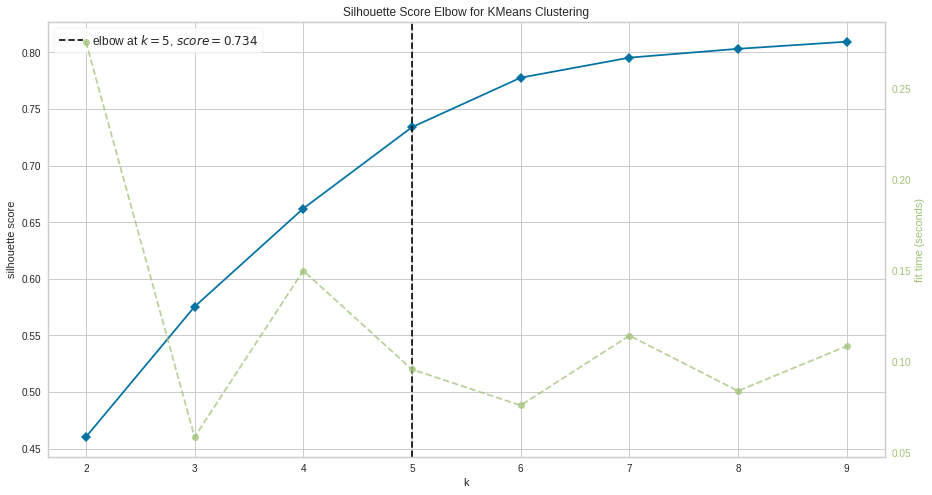

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), entertainment_new_features, k=(2,10),metric='silhouette',timings=True) 

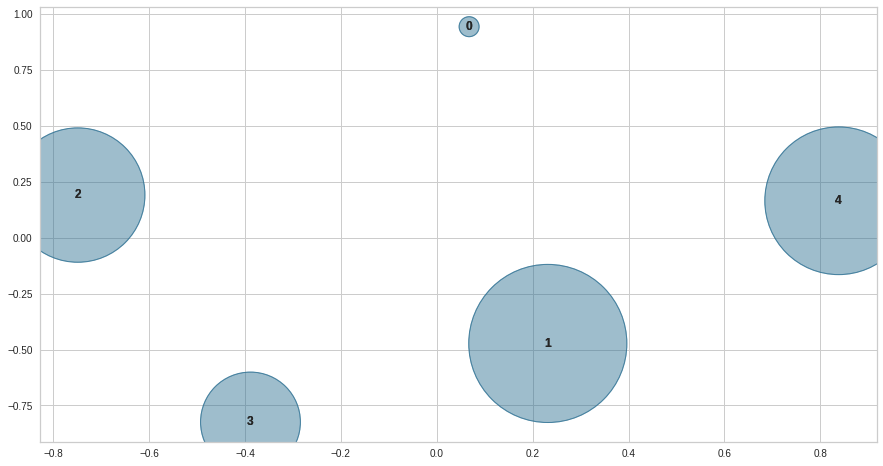

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(5,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(entertainment_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 5 so we will build the kmean model and use k=5
entertainment_kmean_model = KMeans(n_clusters=5,init='k-means++',random_state=rs)
entertainment_kmean_output = entertainment_kmean_model.fit_predict(entertainment_new_features)
entertainment_kmean_output

array([1, 2, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 2,
       1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       4, 4, 1, 1, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 2, 1, 0, 4, 4, 2, 4, 0,
       0, 1, 4, 4, 4, 4, 4, 0, 1, 4, 4, 1, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       4, 0, 1, 0, 1, 1, 1, 4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 2, 4, 1, 1, 0,
       4, 4, 1, 4, 4, 1, 0, 4, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 1, 0, 4, 4,
       2, 4, 1, 4, 0, 4, 0, 1, 2, 0, 4, 0, 4, 0, 0, 2, 0, 2, 1, 0, 2, 4,
       4, 0, 4, 4, 2, 4, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 1], dtype=int32)

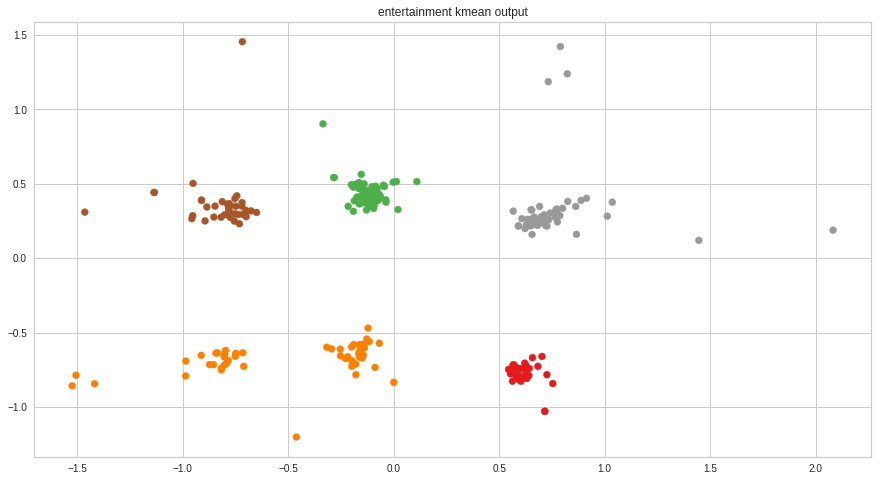

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(entertainment_new_features[:, 0], entertainment_new_features[:, 1], c=entertainment_kmean_output,cmap='Set1')
plt.title("entertainment kmean output")
plt.show()

## Medical

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(medical.iloc[:,0])
bow_names = bow.get_feature_names()

medical_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
medical_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,01,10,101stincarnationmonthcelebr,118,14,14th,15,1504,16,...,yesterday,yet,york,youn,young,youth,ziplin,ziyech,zombi,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
medical_new_features = pca.fit_transform(medical_df)
medical_new_features 

array([[ 6.31893573e-02,  5.76177387e-01],
       [ 1.31906894e-01,  8.38147361e-01],
       [ 4.84428878e-01, -3.00089111e-01],
       [ 9.87039138e-02,  4.94607650e-01],
       [-3.84834306e-01, -8.24801801e-01],
       [-1.12282048e+00,  2.07325887e-01],
       [ 5.48707497e-01, -3.21723960e-01],
       [-3.58408469e-01, -7.75015442e-01],
       [ 1.51673216e-01,  8.51676509e-01],
       [ 4.41230910e-02,  6.59776815e-01],
       [ 1.43365466e+00,  2.36378818e-01],
       [ 7.48112550e-02,  5.11619984e-01],
       [ 1.26324389e-02,  5.31993973e-01],
       [-9.24499989e-01,  2.65332480e-02],
       [ 7.28195388e-02,  6.35349384e-01],
       [-9.24499989e-01,  2.65332482e-02],
       [-7.55916076e-01,  2.48732288e-02],
       [ 6.03550551e-01, -1.82407803e-01],
       [ 7.04538871e-02,  5.97500937e-01],
       [ 8.03809712e-02,  7.96620142e-01],
       [-3.16052274e-01, -6.77704848e-01],
       [ 4.73816229e-01, -2.81739692e-01],
       [-8.43163064e-01,  2.29129936e-01],
       [ 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Medical Data After Dimentionality Reduction')

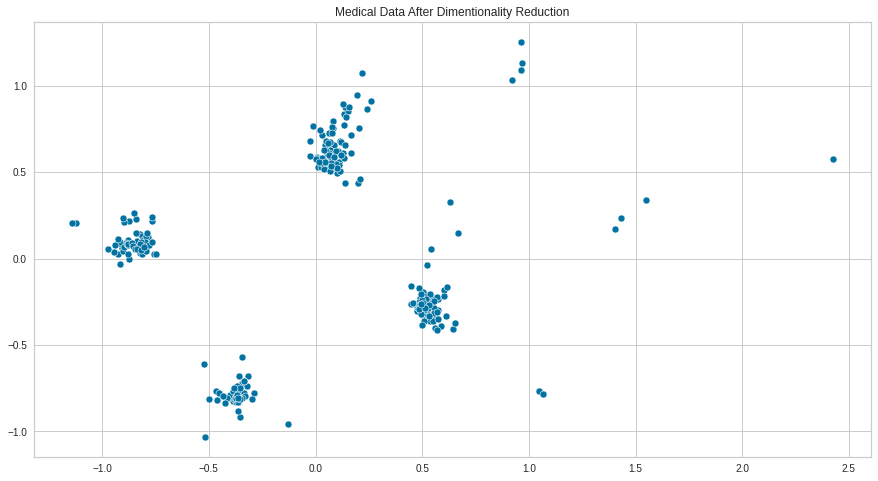

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(medical_new_features[:,0],medical_new_features[:,1])
plt.title("Medical Data After Dimentionality Reduction")

### Kmeans

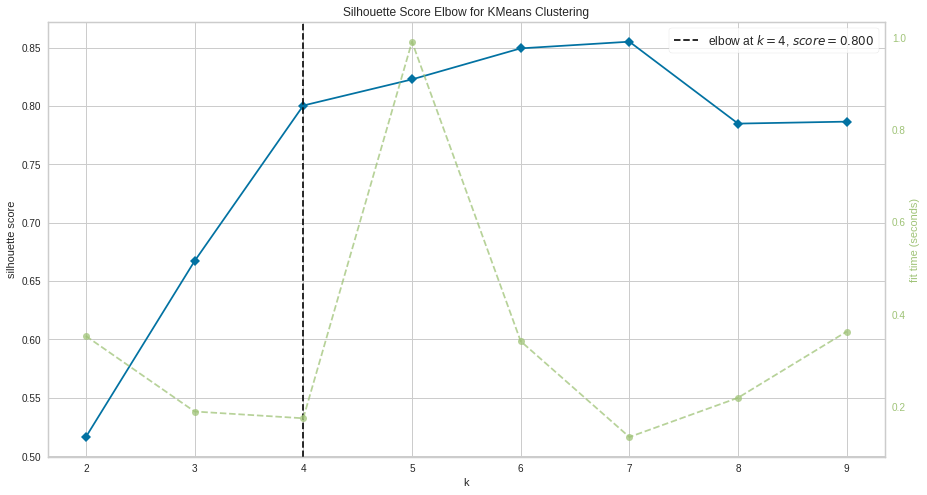

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), medical_new_features, k=(2,10),metric='silhouette',timings=True)

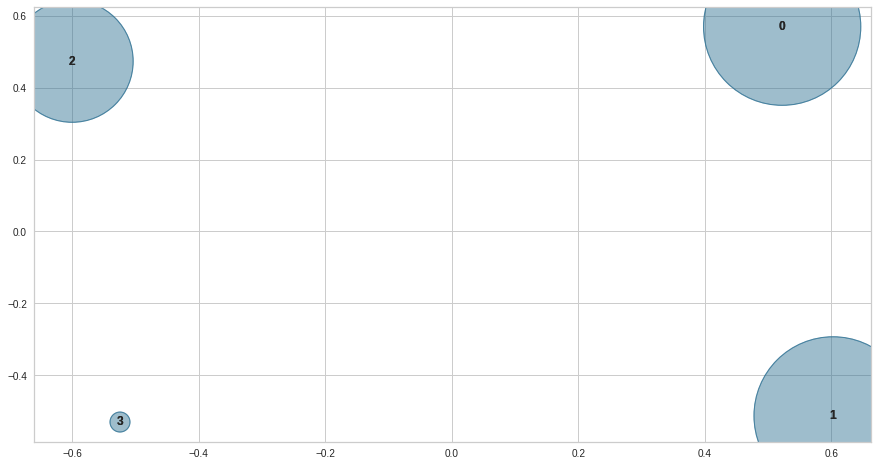

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(4,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(medical_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 4 so we will build the kmean model and use k=4
medical_kmean_model = KMeans(n_clusters=4,init='k-means++',random_state=rs)
medical_kmean_output = medical_kmean_model.fit_predict(medical_new_features)
medical_kmean_output

array([0, 0, 1, 0, 3, 2, 1, 3, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 3, 1,
       2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0, 3, 3, 1, 0, 0, 0, 0, 0, 2, 0, 1, 3, 1, 2, 0, 3, 2, 0, 0, 1,
       3, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 1, 0,
       3, 1, 1, 1, 0, 0, 2, 0, 0, 0, 3, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3,
       1, 0, 0, 3, 2, 0, 0, 3, 0, 3, 0, 1, 2, 2, 0, 0, 1, 2, 3, 1, 0, 1,
       3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 3, 0, 0, 3, 2, 3,
       2, 0, 1, 1, 1, 3, 3, 3, 0, 2, 1, 2, 1, 3, 0, 1, 2, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2,
       2, 0, 2, 3, 3, 1, 0, 0, 1, 0, 3, 0, 2, 2, 0, 1, 3, 1, 2, 1, 1, 3,
       3, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 2, 2, 3, 1, 1, 0, 3, 2, 1, 0, 3, 0, 2, 2, 1, 2, 1, 3,
       2, 1, 0, 0, 0, 1, 1, 1, 3, 0, 1, 1, 3], dtyp

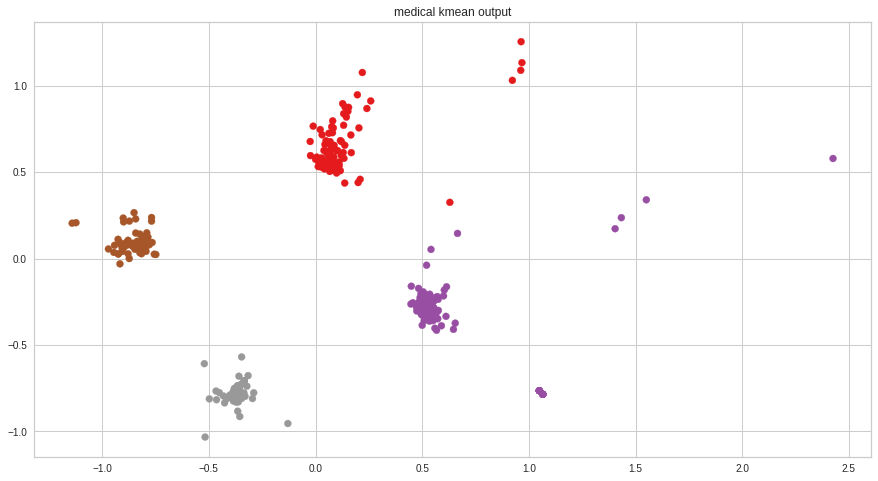

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(medical_new_features[:, 0], medical_new_features[:, 1], c=medical_kmean_output,cmap='Set1')
plt.title("medical kmean output")
plt.show()

## Politics

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(politics.iloc[:,0])
bow_names = bow.get_feature_names()

politics_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
politics_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,10k,11,12,13,15,16,17,...,yet,yike,york,young,yovanovich,yovanovitch,yr,zero,zionist,zombi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
politics_new_features = pca.fit_transform(politics_df)
politics_new_features

array([[-0.27199305, -0.19507902],
       [-0.20598121, -0.19778592],
       [ 0.51768598, -0.33820795],
       [-0.77149622,  0.34009849],
       [ 0.42391256,  0.23354097],
       [-0.57298759,  0.14871329],
       [ 0.19905289,  0.93315083],
       [ 0.28105457,  0.25064118],
       [-0.31221   , -0.23328555],
       [-0.24973384, -0.18796706],
       [-0.2723654 , -0.25274097],
       [-0.37815284, -0.32121434],
       [-0.33107798, -0.23130554],
       [ 0.99932704,  0.19209088],
       [-0.23489335, -0.16963719],
       [-0.27667673, -0.22731349],
       [ 0.31416459,  0.26306049],
       [-0.64633822, -0.19147585],
       [-0.30960331, -0.10299717],
       [-0.23817968, -0.2146853 ],
       [-0.42400641, -0.08672644],
       [ 0.43747695, -0.28188195],
       [-0.58482498,  0.15960098],
       [ 0.42992827,  0.3116881 ],
       [-1.3471219 ,  0.22525182],
       [-0.45705192, -0.48389334],
       [-0.33726229, -0.21646105],
       [-0.63705936, -0.11617042],
       [-0.52927732,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'politics Data After Dimentionality Reduction')

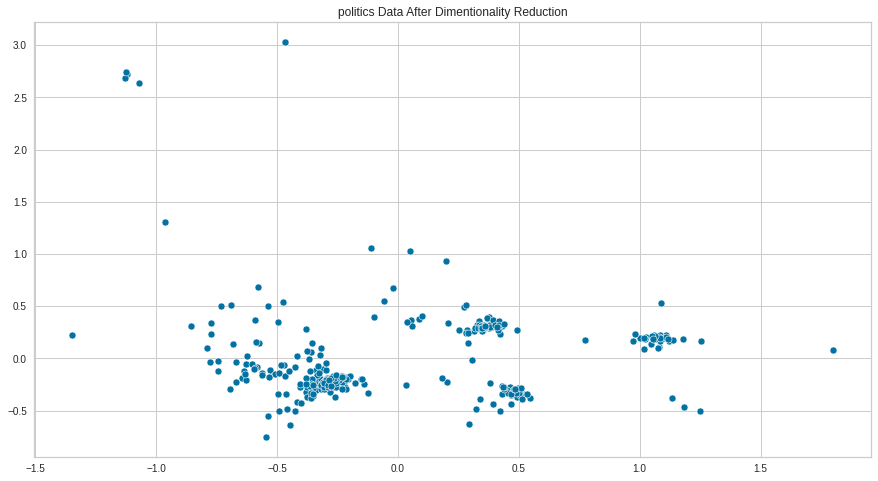

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(politics_new_features[:,0],politics_new_features[:,1])
plt.title("politics Data After Dimentionality Reduction")

### Kmeans

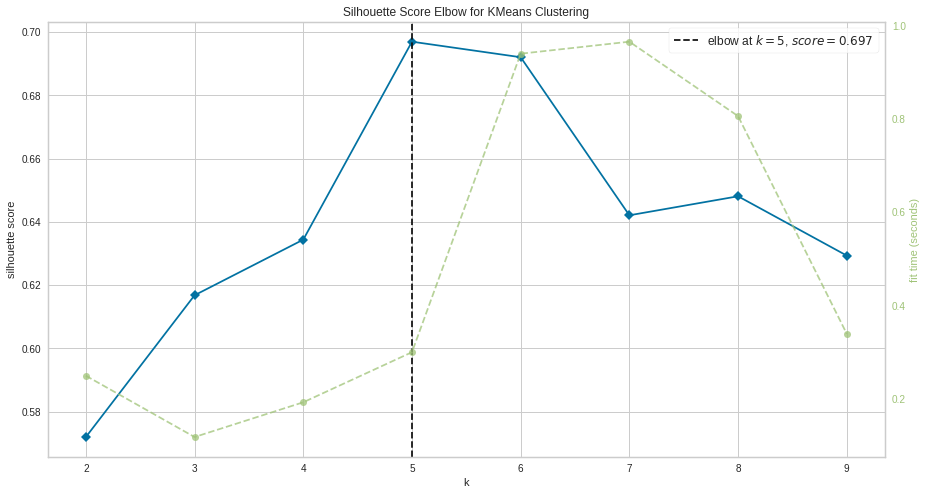

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), politics_new_features, k=(2,10),metric='silhouette',timings=True)  

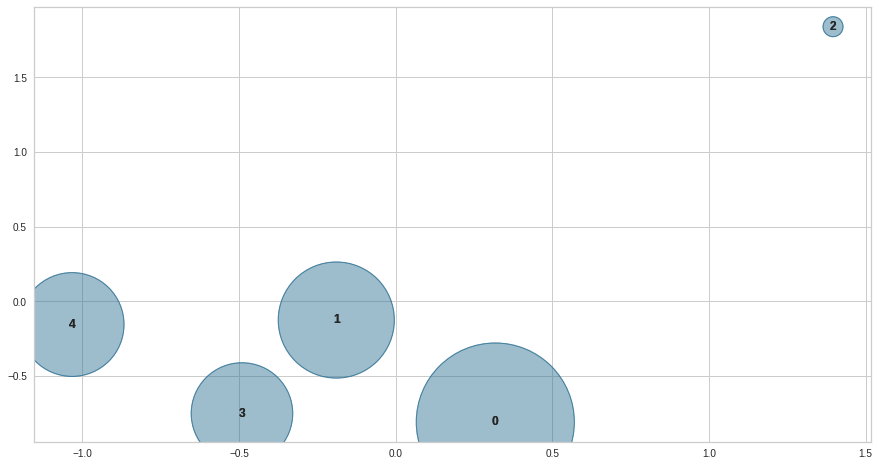

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(5,init='k-means++',random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(politics_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 5 so we will build the kmean model and use k=5
politics_kmean_model = KMeans(n_clusters=5,init='k-means++',random_state=rs)
politics_kmean_output = politics_kmean_model.fit_predict(politics_new_features)
politics_kmean_output

array([0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 1, 3,
       0, 2, 0, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0,
       0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       4, 0, 1, 0, 0, 4, 4, 0, 0, 3, 1, 0, 1, 1, 4, 0, 0, 3, 3, 0, 0, 3,
       0, 1, 3, 0, 0, 4, 0, 4, 0, 4, 4, 1, 1, 1, 0, 4, 1, 3, 4, 0, 1, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 1, 1, 1, 0, 0, 1, 0,
       0, 3, 3, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 4, 0, 4, 0,
       1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 4,
       1, 1, 1, 0, 4, 1, 0, 0, 0, 3, 4, 0, 0, 3, 1, 0, 0, 0, 4, 4, 4, 0,
       0, 0, 4, 0, 0, 4, 0, 0, 0, 1, 3, 1, 4, 0, 4, 4, 0, 0, 3, 4, 0, 4,
       1, 2, 0, 1, 0, 2, 0, 3, 1, 0, 0, 0, 4, 0, 0, 0, 1, 0, 4, 0, 3, 0,
       4, 1, 3, 3, 1, 0, 1, 3, 0, 4, 1, 0, 0, 0, 4,

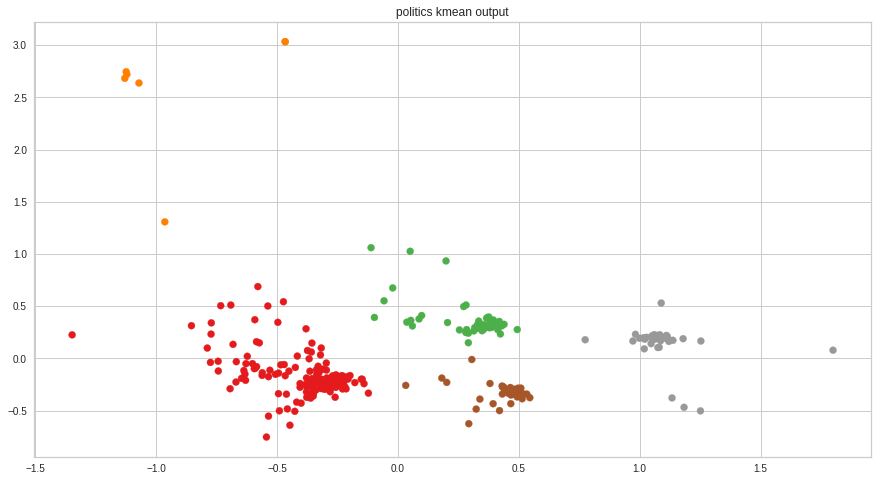

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(politics_new_features[:, 0], politics_new_features[:, 1], c=politics_kmean_output,cmap='Set1')
plt.title("politics kmean output")
plt.show()

## Financial

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(financial.iloc[:,0])
bow_names = bow.get_feature_names()

financial_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
financial_df

In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
financial_new_features = pca.fit_transform(financial_df)
financial_new_features

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(financial_new_features[:,0],financial_new_features[:,1])
plt.title("financial Data After Dimentionality Reduction")

### Kmeans

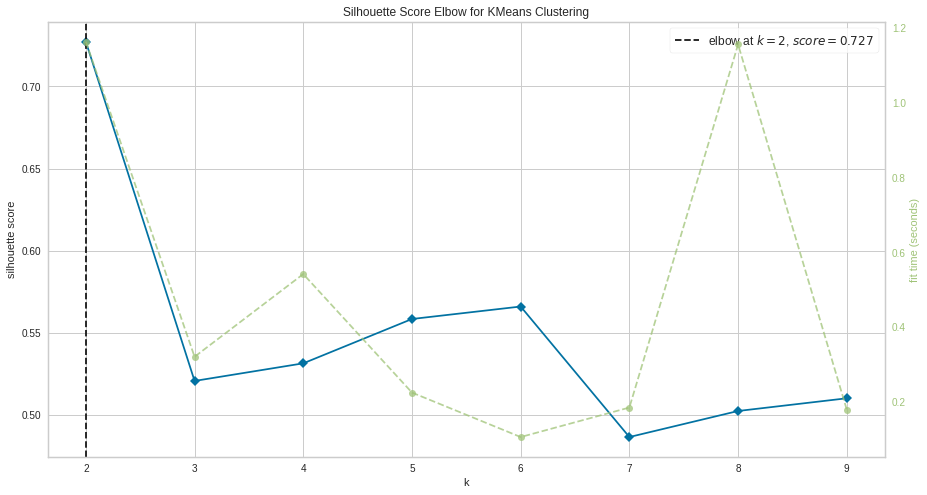

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), financial_new_features, k=(2,10),metric='silhouette',timings=True)  

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


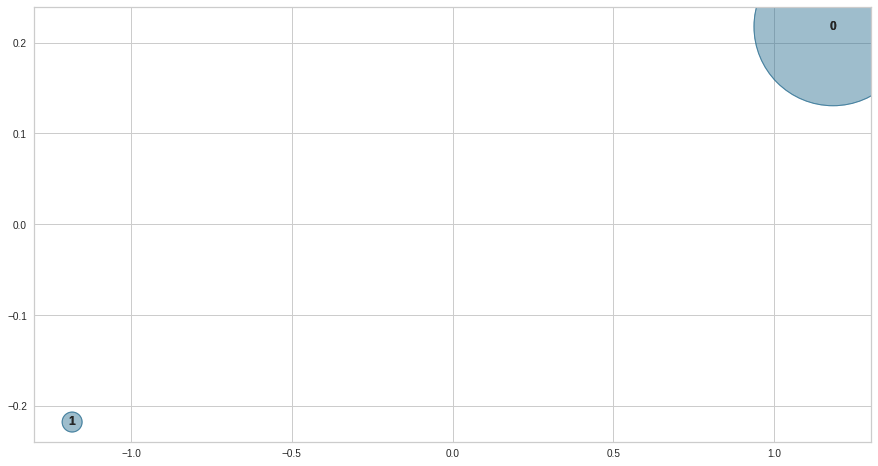

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(2,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(financial_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 2 so we will build the kmean model and use k=2
financial_kmean_model = KMeans(n_clusters=2,init='k-means++',random_state=rs)
financial_kmean_output = financial_kmean_model.fit_predict(financial_new_features)
financial_kmean_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

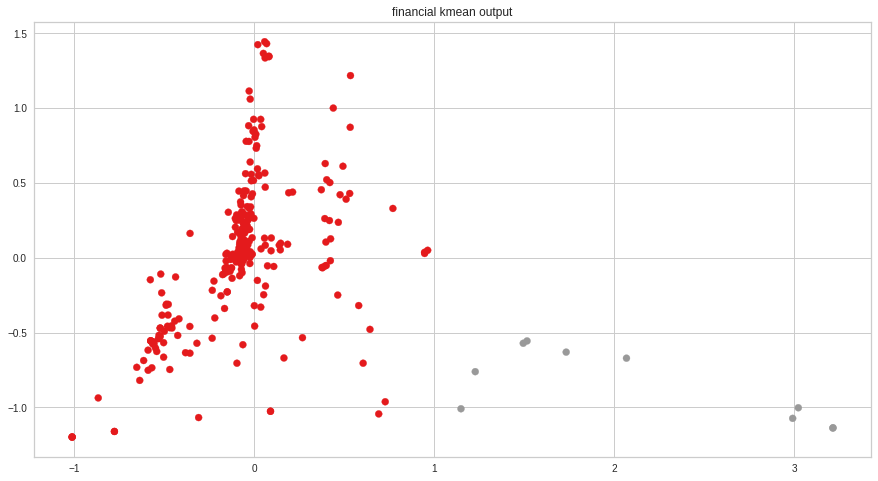

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(financial_new_features[:, 0], financial_new_features[:, 1], c=financial_kmean_output,cmap='Set1')
plt.title("financial kmean output")
plt.show()

# Cluster All Model Feilds

In [ ]:
#BOW
bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
bow_fit = bow.fit_transform(df.iloc[:,0])
bow_names = bow.get_feature_names()

all_model_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
all_model_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0001193125,01,014,04,041,05,05523v2,06,...,ziplin,ziyech,znga,zoi,zombi,zone,zoo,zto,zuma,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#using pca to minimize the number of features
pca = PCA(n_components=2)
all_model_new_features = pca.fit_transform(all_model_df)
all_model_new_features

array([[-0.53561308, -0.10494019],
       [-0.50450603, -0.2915557 ],
       [-0.45634755, -0.33003603],
       ...,
       [ 0.45175577, -0.07484987],
       [-0.5399893 , -0.1226001 ],
       [-0.57551324, -0.14404261]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'All Data After Dimentionality Reduction')

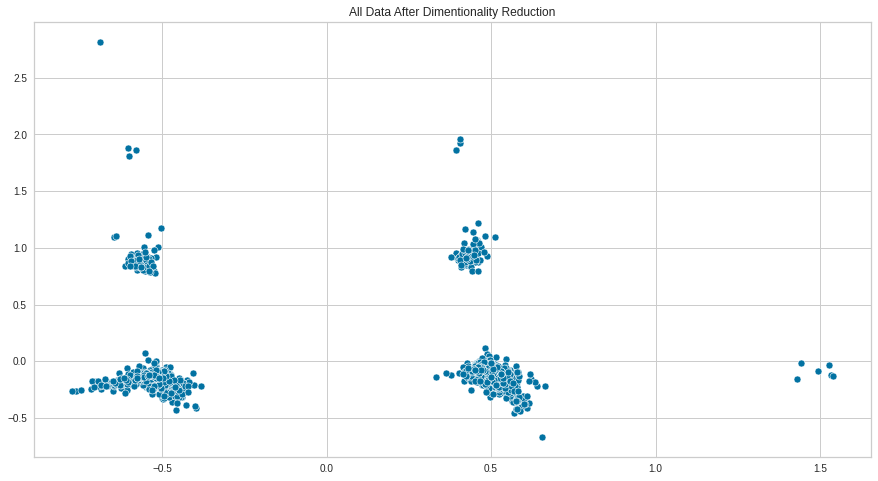

In [ ]:
#plot the data after making dimensionality reduction
plt.figure(figsize=(15,8))
sns.scatterplot(all_model_new_features[:,0],all_model_new_features[:,1])
plt.title("All Data After Dimentionality Reduction")

### KMeans

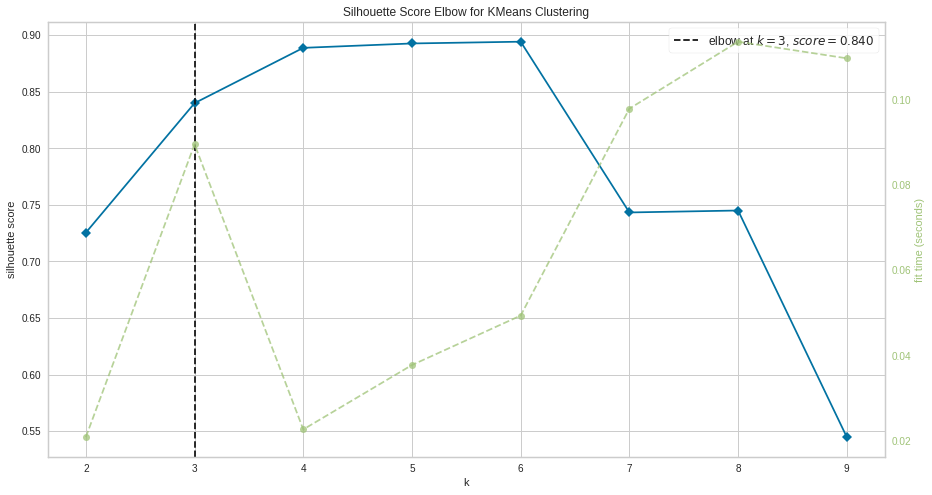

In [ ]:
#choose the best number to k '#clusters'
plt.figure(figsize=(15,8))
model = kelbow_visualizer(KMeans(random_state=rs), all_model_new_features, k=(2,10),metric='silhouette',timings=True) 

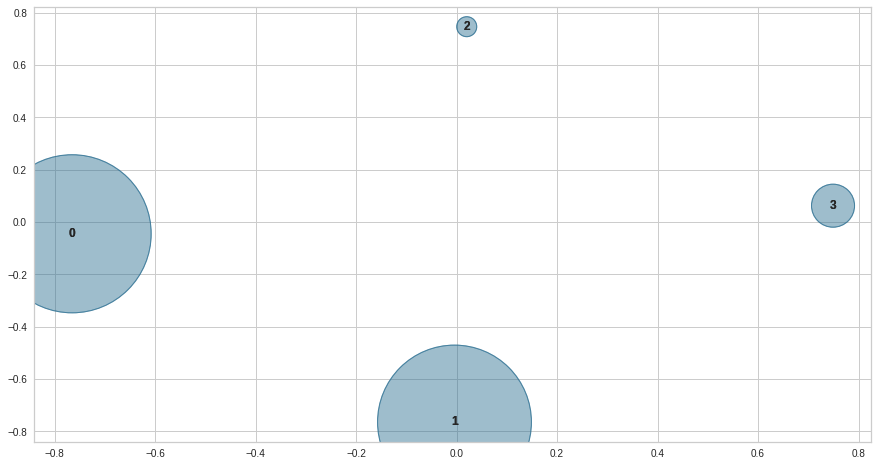

In [ ]:
#display the entra-distance between the clusters
plt.figure(figsize=(15,8))
model = KMeans(4,random_state=rs)
visualizer = InterclusterDistance(model)

visualizer.fit(all_model_new_features)        
visualizer.draw()

In [ ]:
#from the previous figures the optimal number of clusters 'k' is 4 so we will build the kmean model and use k=4
all_model_kmean_model = KMeans(n_clusters=4,init='k-means++',random_state=rs)
all_model_kmean_output = all_model_kmean_model.fit_predict(all_model_new_features)
all_model_kmean_output

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

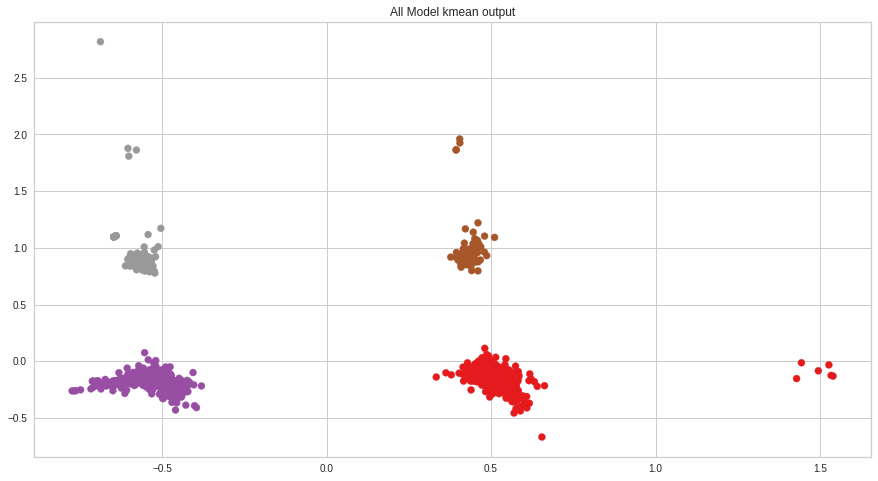

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(all_model_new_features[:, 0], all_model_new_features[:, 1], c=all_model_kmean_output,cmap='Set1')
plt.title("All Model kmean output")
plt.show()

# Cassification model:

##Ensemble

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(training,testing):
  x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.2,random_state=0)
  return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test = split_data(features1_df,df['type'])

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf1 = svm.SVC(kernel= 'rbf', probability=True)
clf2 = RandomForestClassifier(random_state=0)
clf3 = GaussianNB()

In [ ]:
ens = VotingClassifier(estimators=[('SVM', clf1), ('RF', clf2), ('GNB', clf3)], voting='soft')
ens = ens.fit(x_train, y_train)

In [ ]:
cv_results = cross_val_score(ens,x_train,y_train,cv=5)
print(f'the cross_validation result is {np.mean(cv_results)}')
predicted = ens.predict(x_test)
print(f'the accuracy is {metrics.accuracy_score(y_test,predicted)}')

the cross_validation result is 0.803261068926305
the accuracy is 0.78839590443686


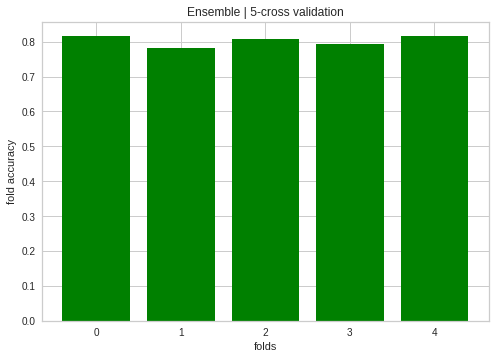

In [ ]:
plt.bar(np.arange(5), cv_results, color = 'green')
plt.title("Ensemble | 5-cross validation")
plt.ylabel("fold accuracy")
plt.xlabel("folds")
plt.show()

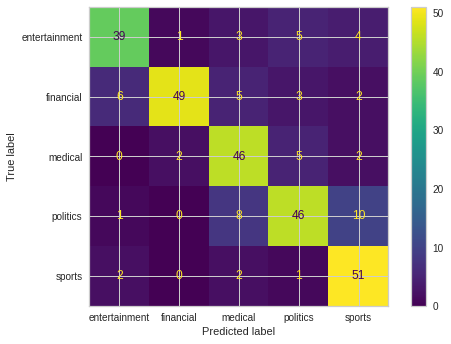

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=ens.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ens.classes_)

disp.plot()
plt.show()

#Error Analysis

In [ ]:
# pd.set_option('display.max_colwidth', -1) # Show the whole text while displaying the dataframe
analysis_df = df.loc[x_test.index]
analysis_df

,text,type
530,alcohol one worst legal money popular caffein ...,medical
1226,chk expect stock would trade higher aftermarke...,financial
459,bill hospit execut paid way past b,medical
279,rt larri bought ticket loui concert function k...,entertainment
657,pm modi vs ima either prove doctor bribe pharm...,medical
...,...,...
440,rt trump save preexist condit peopl preexist m...,medical
1253,ppg new insid file chairman board ceo michael ...,financial
494,rt sky glow purpl light medic marijuana farm,medical
61,rt wasim khan best thing happen pakistan crick...,sports


In [ ]:
analysis_df['pred_type'] = predicted
analysis_df

,text,type,pred_type
530,alcohol one worst legal money popular caffein ...,medical,sports
1226,chk expect stock would trade higher aftermarke...,financial,financial
459,bill hospit execut paid way past b,medical,financial
279,rt larri bought ticket loui concert function k...,entertainment,entertainment
657,pm modi vs ima either prove doctor bribe pharm...,medical,medical
...,...,...,...
440,rt trump save preexist condit peopl preexist m...,medical,medical
1253,ppg new insid file chairman board ceo michael ...,financial,financial
494,rt sky glow purpl light medic marijuana farm,medical,medical
61,rt wasim khan best thing happen pakistan crick...,sports,sports


##Analysis on correctly predicted 

In [ ]:
from IPython.core.display import clear_output
crct_analysis_df = analysis_df.query('type==pred_type')
clear_output()
crct_analysis_df

,text,type,pred_type
1226,chk expect stock would trade higher aftermarke...,financial,financial
279,rt larri bought ticket loui concert function k...,entertainment,entertainment
657,pm modi vs ima either prove doctor bribe pharm...,medical,medical
805,rt still ignor fact con lost elect polici bair...,politics,politics
1405,gpc hrl jnj,financial,financial
...,...,...,...
440,rt trump save preexist condit peopl preexist m...,medical,medical
1253,ppg new insid file chairman board ceo michael ...,financial,financial
494,rt sky glow purpl light medic marijuana farm,medical,medical
61,rt wasim khan best thing happen pakistan crick...,sports,sports


In [ ]:
txt_len = np.array([len(txt) for txt in crct_analysis_df.text]) 
txt_len.sum() / txt_len.shape[0]

65.6103896103896

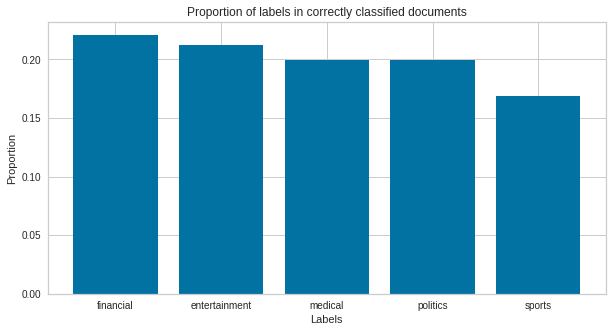

In [ ]:
fig = plt.figure(figsize = (10, 5))
proportion = crct_analysis_df.type.value_counts() / crct_analysis_df.type.shape[0]
plt.bar(crct_analysis_df.type.unique(), proportion)
plt.title('Proportion of labels in correctly classified documents')
plt.xlabel('Labels')
plt.ylabel('Proportion')
plt.show()

In [ ]:
from collections import Counter

crct_vocab = ''.join(x for x in crct_analysis_df.text)
crct_vocab = crct_vocab.split()
counter = Counter(crct_vocab)
crct_most_frequent_words = counter.most_common(100) 
crct_most_frequent_words = pd.DataFrame(crct_most_frequent_words, columns=['word', 'freq'])
crct_most_frequent_words.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
word,medic,concert,cricket,amp,movi,tenni,new,polit,year,doctor,...,spirit,award,chang,media,short,keep,candid,salt,lake,citi
freq,37,20,20,18,14,13,13,13,10,9,...,3,3,3,3,3,3,3,3,3,3


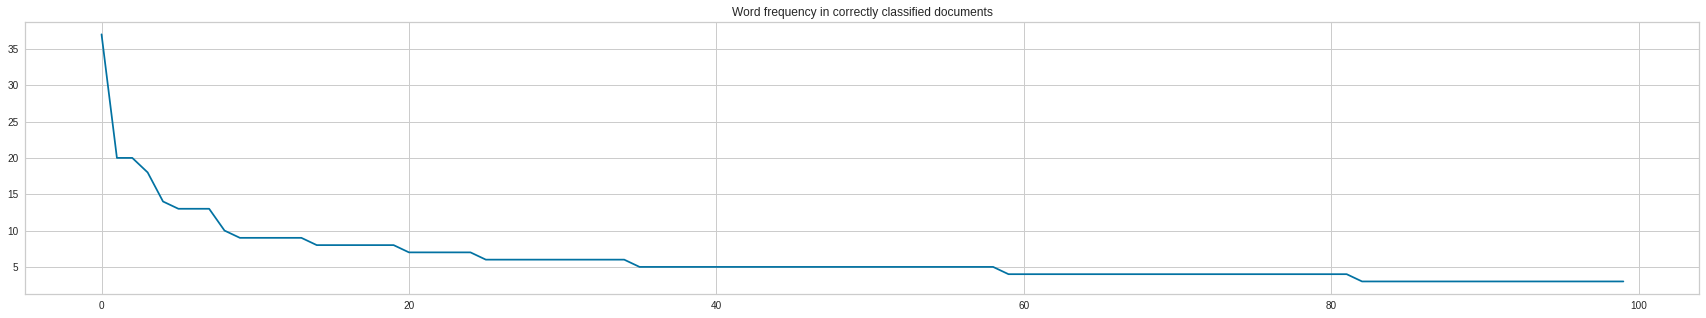

In [ ]:
fig = plt.figure(figsize = (30, 5))
plt.plot(crct_most_frequent_words.loc[:, 'word'].index, crct_most_frequent_words.loc[:, 'freq'])
plt.title('Word frequency in correctly classified documents')
plt.show()

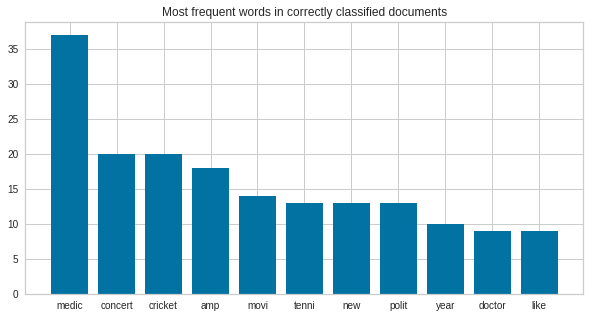

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(crct_most_frequent_words.loc[:10, 'word'], crct_most_frequent_words.loc[:10, 'freq'])
plt.title('Most frequent words in correctly classified documents')
plt.show()

##Analysis on wrongly predicted 

In [ ]:
from IPython.core.display import clear_output
err_analysis_df = analysis_df.query('type!=pred_type')
pd.set_option('display.max_colwidth', -1)
clear_output()
err_analysis_df

,text,type,pred_type
530,alcohol one worst legal money popular caffein terribl addi,medical,sports
459,bill hospit execut paid way past b,medical,financial
505,job madison unit state health inform coder irf assist establish maintain p assist,medical,politics
483,rt daili remind trump feder court argu end famili coverag pre existi,medical,politics
142,rt anyon post neverwarren get block immedi kind nonsens tell realli concern,entertainment,politics
...,...,...,...
56,rt enjoy latest ride england rollercoast special report up amp down f,sports,medical
1354,boom ntnx gt yesterday hod need surg push past 58 90 level though perhap news catalyst,financial,entertainment
1213,nwl also alright,financial,entertainment
1408,met,financial,sports


In [ ]:
txt_len = np.array([len(txt) for txt in err_analysis_df.text]) 
print('Average lenght of documents:', txt_len.sum() / txt_len.shape[0])

Average lenght of documents: 61.435483870967744


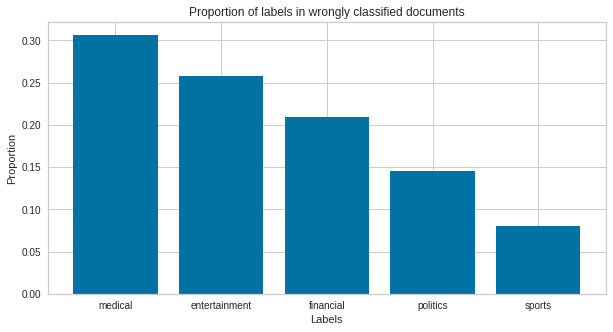

In [ ]:
fig = plt.figure(figsize = (10, 5))
proportion = err_analysis_df.type.value_counts() / err_analysis_df.type.shape[0]
plt.bar(err_analysis_df.type.unique(), proportion)
plt.title('Proportion of labels in wrongly classified documents')
plt.xlabel('Labels')
plt.ylabel('Proportion')
plt.show()

In [ ]:
from collections import Counter

err_vocab = ''.join(x for x in err_analysis_df.text)
err_vocab = err_vocab.split()
counter = Counter(err_vocab)
err_most_frequent_words = counter.most_common(100) 
err_most_frequent_words = pd.DataFrame(err_most_frequent_words, columns=['word', 'freq'])
err_most_frequent_words.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
word,state,2,us,amp,use,get,year,target,hear,peopl,...,existirt,post,neverwarren,block,immedi,kind,nonsens,tell,realli,concernrt
freq,4,4,4,4,4,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1


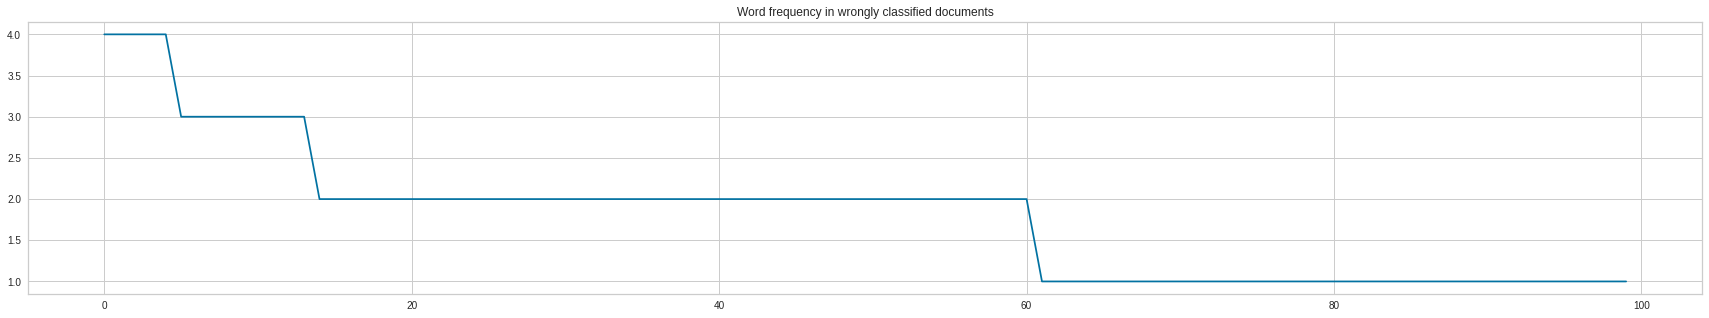

In [ ]:
fig = plt.figure(figsize = (30, 5))
plt.plot(err_most_frequent_words.loc[:, 'word'].index, err_most_frequent_words.loc[:, 'freq'])
plt.title('Word frequency in wrongly classified documents')
plt.show()

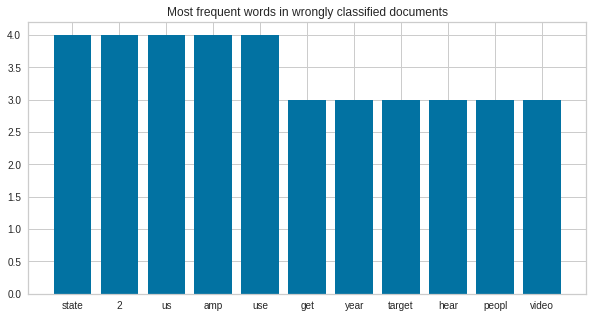

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(err_most_frequent_words.loc[:10, 'word'], err_most_frequent_words.loc[:10, 'freq'])
plt.title('Most frequent words in wrongly classified documents')
plt.show()

#Test Case

In [ ]:
#Create a virtual user whose interests are:
# 45% sports, 30% ploitics, 15% entertainment, 10% medical, 0%financial
test_user = df.query("type == 'sports'").sample(n=45, replace=False, random_state=1)
test_user = test_user.append(df.query("type == 'politics'").sample(n=30, replace=False, random_state=1))

test_user = test_user.append(df.query("type == 'medical'").sample(n=10, replace=False, random_state=1))
test_user = test_user.append(df.query("type == 'entertainment'").sample(n=15, replace=False, random_state=1))

##classifying to determine user interests:

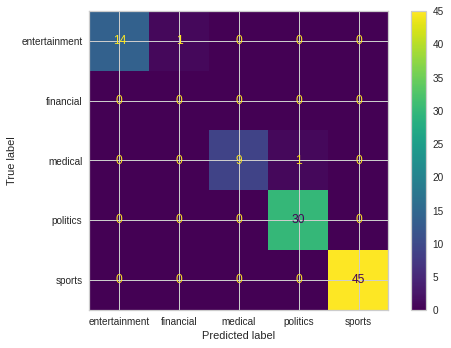

In [ ]:
#Apply classiffcation:
pred = ens.predict(features1_df.iloc[test_user.index])
cm = confusion_matrix(test_user["type"], pred, labels=ens.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ens.classes_)

disp.plot()
plt.show()

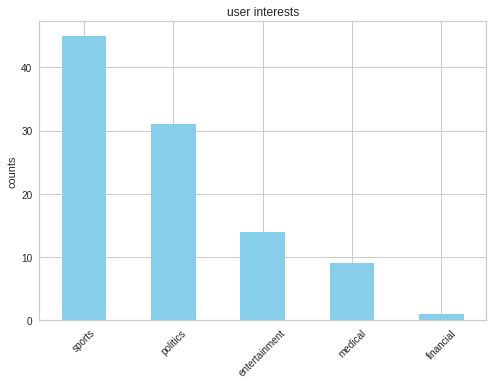

In [ ]:
#visualize users interests after classification:
test_user["pred"] = pred

test_user["pred"].value_counts().plot.bar(color='skyblue', align='center')
plt.ylabel('counts')
plt.xticks(rotation = 45)
plt.title("user interests")
plt.show()

In [ ]:
counts = test_user["pred"].value_counts()
#top interests of the user (>30% of his tweets) 
top = counts[counts>30]
top

sports      45
politics    31
Name: pred, dtype: int64

So, the test user's top interests are sports(45%) and politics(31%)
The next step is to recommend most similar tweets of these topics to the user using clustering


##clustering to recommend most similar tweets:

In [ ]:
df["pred_type"] = ens.predict(features1_df)

In [ ]:
#Split Data into Fields

sports = df[df.pred_type == 'sports']
entertainment = df[df.pred_type == 'entertainment']
medical = df[df.pred_type == 'medical']
politics = df[df.pred_type == 'politics']
financial = df[df.pred_type == 'financial']

In [ ]:
def convert_to_work_with_cluster(feild_df):
  #BOW
  bow = CountVectorizer(analyzer='word', ngram_range=(1, 1)) 
  bow_fit = bow.fit_transform(feild_df.iloc[:,0])
  bow_names = bow.get_feature_names_out()

  field_model_df = pd.DataFrame(bow_fit.toarray() ,columns = bow_names)
  pca = PCA(n_components=2)
  return pca.fit_transform(field_model_df)

In [ ]:
def plot_output_of_cluster(feild_df,field_cluster_output):
  converted_data = convert_to_work_with_cluster(feild_df)
  plt.figure(figsize=(15,8))
  plt.scatter(converted_data[:, 0], converted_data[:, 1], c=field_cluster_output,cmap='Set1')
  plt.title("Field Model kmean output")
  plt.show()

In [ ]:
recommendations = pd.DataFrame()
recommend_df =  pd.DataFrame(columns = ["text",	"type",	"pred_type",	"cluster"])
for i in top.keys():
  if i == "politics": recommend_df = politics.copy()
  elif i == "sports" : recommend_df = sports#.reset_index(drop=True)
  elif i == "entertainment" : recommend_df == entertainment
  elif i == "medical" : recommend_df == medical
  elif i == "financial" : recommend_df == financial

  #get the clusters:
  clusters = sports_kmean_model.fit_predict(convert_to_work_with_cluster(recommend_df))
  user_clusters = sports_kmean_model.fit_predict(convert_to_work_with_cluster(test_user[test_user.pred == i]))
  print(user_clusters)
  recommend_df["cluster"] = clusters
  r=recommend_df.merge(test_user,
                      on='text',
                      how='outer', indicator=True)
  
  c = pd.Series(user_clusters).value_counts()
  #c = recommend_df[test_user.pred == i].cluster.value_counts()
  print(f"{i} clusters & counts:\n{c}" )
  percsntages = []
  for j in c.keys():
    p=(c[j]/sum(c))
    recommendations = recommendations.append(r[r.cluster == j].sample(n = int(p*10), replace=False, random_state=1))[["text", "pred_type", "cluster"]]

[4 1 4 4 0 4 4 3 0 4 0 3 3 4 0 0 0 1 4 4 3 1 0 4 4 3 1 0 4 4 3 4 1 3 3 4 3
 0 4 0 4 4 5 1 2]
sports clusters & counts:
4    18
0    10
3    9 
1    6 
5    1 
2    1 
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[1 3 2 3 2 1 3 1 5 3 5 3 3 1 1 5 5 3 1 1 5 4 0 4 5 5 1 2 5 2 5]
politics clusters & counts:
5    9
1    8
3    7
2    4
4    2
0    1
dtype: int64


In [ ]:
#del[[recommend_df]]
recommendations[recommendations.pred_type == "sports"].reset_index(drop = True)

,text,pred_type,cluster
0,imagin plenti like shame hardli anyon took notic al,sports,4.0
1,hey rich thank reach still look match offici stat,sports,4.0
2,atp auckland deni shapovalov john isner win fognini khachanov,sports,4.0
3,made beat,sports,4.0
4,tenni player australian open issu ga mask,sports,0.0
5,bet gen cide armi blow cloud still play tenni countri burn delud,sports,0.0
6,bring cricket,sports,3.0
7,smart cricket ball measur bowl perform sportcor smartbal work technolog start,sports,3.0
8,rt farewel jean paul dumini wish best next chapter serv cricket countri,sports,1.0


In [ ]:
recommendations[recommendations.pred_type == "politics"].reset_index(drop = True)

,text,pred_type,cluster
0,like see timelin today peopl get black pill id polit real time lol,politics,5.0
1,seem surpris someon play polit must new,politics,5.0
2,rt central govern leav stone unturn west bengal develop urg west bengal govern,politics,1.0
3,rt fact check democrat demdeb heap prais iran deal obama admit deal still kept ira,politics,1.0
4,rt ukrain prosecutor offer inform relat biden exchang ambassador ouster newli releas materi show ht,politics,3.0
5,rt new ukrain prosecutor offer inform relat biden exchang ambassador ouster newli releas materi,politics,3.0
6,investig matter determin best help effingham said,politics,2.0
